In [1]:
import torch
import corner
import numpy as np
import pylab as plt

import swyft

DEVICE = 'cuda'

%load_ext autoreload
%autoreload 2

In [2]:
def model(par):
    return dict(spec=np.linspace(-1, 1, 5)*par['A']+par['B'])

def noise(obs, par):
    obs['spec'] += np.random.randn(*obs['spec'].shape)*0.5
    return obs

### Storage

In [3]:
cache = swyft.MemoryCache(par_names = ["A", "B"], obs_shapes = {"spec": (5,)})

Creating new cache.


### Prior

In [4]:
prior_conf = {"A": ["normal", 0.0, 1.0], "B": ["normal",  0., 1.0]}

In [ ]:
par0 = {"A": 0.5, "B": 0.5}
obs0 = noise(model(par0), par0)

In [10]:
s = swyft.SWYFT(model, noise, prior_conf, cache, obs = obs0, device = DEVICE)
s.run([300, 300])
s.round(1000, [("A", "B")])

No new simulator runs required.
No simulations required.
Number of features from head network: 5
Number of parameters to estimate: 2
Maximum posterior dimensionality: 1
Start training
LR iteration 0
Validation loss: 13.88788366317749
Validation loss: 11.466135740280151
Validation loss: 12.19942331314087
Total epochs: 3
LR iteration 1
Validation loss: 9.906060695648193
Validation loss: 10.522135257720947
Total epochs: 2


Simulate: 100%|██████████| 66/66 [00:00<00:00, 381.84it/s]

Adding 66 new samples. Run simulator!


Number of features from head network: 5
Number of parameters to estimate: 2
Maximum posterior dimensionality: 1
Start training
LR iteration 0
Validation loss: 17.495644569396973
Validation loss: 14.66696310043335
Validation loss: 14.436178207397461
Validation loss: 13.33869457244873
Validation loss: 15.516663789749146
Total epochs: 5
LR iteration 1
Validation loss: 12.720489978790283
Validation loss: 12.134520292282104
Validation loss: 15.659820795059204
Total epochs: 3


Simulate:   6%|▌         | 45/818 [00:00<00:01, 446.33it/s]

Adding 818 new samples. Run simulator!


Simulate: 100%|██████████| 818/818 [00:01<00:00, 445.20it/s]


Number of features from head network: 5
Number of parameters to estimate: 1
Maximum posterior dimensionality: 2
Start training
LR iteration 0
Validation loss: 17.584166288375854
Validation loss: 16.570414125919342
Validation loss: 17.001430869102478
Total epochs: 3
LR iteration 1
Validation loss: 16.82401466369629
Validation loss: 15.467629373073578
Validation loss: 15.802135854959488
Total epochs: 3


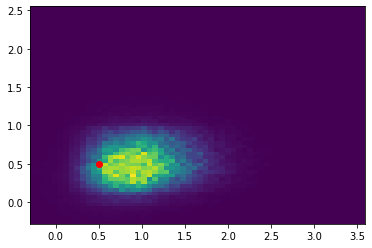

In [15]:
pars, lnL = s.lnL(2)
plt.hist2d(pars['A'], pars['B'], weights = np.exp(lnL[('A','B')]), bins = 60, density = True);
plt.scatter(par0['A'], par0['B'], marker='o', color='r')